# PANOPLY Startup Notebook

This notebook provides an easy-to-use interface to configure a Terra Workspace to run PANOPLY on proteogenomics data. <br>
**Click the `OPEN` button above** and follow these step-by-step instructions to get started. 

-----
### Using this Notebook
<div class="alert alert-block alert-info">

1. Start the **Notebook Runtime** with the `gcr.io/broadcptac/panda:1_2` docker.  
> - Click on the Notebook settings (cog-wheel) at the top right. Use the `ENVIRONMENT` pull down and choose `Custom Environment`. Enter `gcr.io/broadcptac/panda:1_2` into the `CONTAINER IMAGE` text box. Customize `COMPUTE POWER` as needed, and click `CREATE` or `UPDATE`.
2. You can run this notebook multiple times.  
> - The first execution should run all code blocks (except the optional **Color Schemes** section). 
> - Subsequent executions will retain original settings, which can be modified as needed (by running appropriate code blocks), including creating new sample subsets.
 
3. To run a code block, click on it, and either choose `Cell -> Run Cells` or hit `Shift-ENTER`. Running the entire notebook is not recommended since many code blocks require user input. Carefully read each section, and then run the associated code block.
</div>

Running this notebook results in:
* Creating/updating a `config.yaml` configuration file that captures your choices made by running this notebook. If this configuration file is already present (i.e., notebook was already run previsouly), those choices will be reused, and can be optionally modified.
* Uploading input data to the Terra Workspace bucket.
* Creating data subsets, if specified. A default subset `all` including all samples is always created. 
* Configuring parameters and metadata tables in the Terra Workspace to enable single-click execution of PANOPLY workflows.

-----

### Prepare Data
You will need the following data tables to run PANOPLY:

##### Required:
* At least **one proteomics dataset** (global proteome, phosphoproteome, acetylome, ubiquitylome) -- after database searching and quantification;
* Genomics data -- CNA and RNA data (both are required), normalized and filtered as needed;
* `Annotation` table with at least `Sample.ID` and `Type` columns, in addition to an arbitrary number of annotations for the samples.

##### Optional:
* A `groups` file that lists a subset of annotations (one per line) to be used for association and enrichment analysis;
* A default `parameter` file is used, unless one is specified in the input (in `yaml` format);
* Pathway databases for PTM-SEA (PTM-SigDB v1.9.0) and GSEA (v6.2 hallmark pathways) are automatically included, and can be over-ridden by providing appropriate `gmt` input files.

##### Formats:
`Annotation` and `groups` tables must be in `csv` format. The `Annotation` table must include a `Sample.ID` column. `Sample.ID`s must be unique and cannot have duplicates. If a `groups` file is not specified in the input, one can be interactively created using the annotations present in the `annotation` table.

All proteomics and genomics data tables must be in [GCT v1.3 format](https://clue.io/connectopedia/gct_format), with sample ids (column names) conforming to the `Sample.ID`s used in the `annotation` table. Ideally, the sample annotations included in the `annotation` table would be present in the GCT v1.3 data files as column annotations. See [here](https://github.com/broadinstitute/PANOPLY/wiki) for more details.

All genomics data tables must be appropriately normalized/filtered prior to use in PANOPLY. Proteomics data can be optionally normalized/filtered in PANOPLY.

**Continue** by reading the descriptions and requirements, and running appropriate code blocks. 

### Initialize Notebook
Start by running the initialization code block below.

In [3]:
source( "/panda/build-config.r" )
panda_initialize("pipelines")


.. INFO. Previous config.yaml exists.
.. INFO. Input file map, groups and colors restored.
.. INFO. Modify using appropriate Sections.
.. DONE.


# Inputs
Create a **ZIP** compressed file containing *at least one proteome data type and annotation*, along with any additional files:

    - GCT  (proteome, phosphoproteome, acetylome, ubiquitylome, RNA, CNA)
    - CSV  (annotation, groups)
    - YAML (parameters -- defaults to master-parameters.yaml on PANOPLY_PRODUCTION workspace)
    - GMT  (ptmseaDB, gseaDB -- pathway databases for PTMSEA/GSEA, defaults to versions on PANOPLY_PRODUCTION)

### Upload ZIP file to workspace bucket
Open your workspace in a new tab or window. Upload your ZIP file into your workspace by navigating to `DATA` tab -> `Files` tab, and then using the `+` button on the bottom right of your page. Remember this file name and enter it when prompted for it below. ( **NOTE:**  All GCT files must conform to version `#1.3` )

### Map files to data types
Map each `gct`, `csv` or `yaml` file included in the zip file to a category. Run the following code cell to list available data types. For each file, enter a number that corresponds with the correct data type. 

In [4]:
panda_datatypes()

 1: proteome
 2: phosphoproteome
 3: acetylome
 4: ubiquitylome
 5: rna
 6: cna
 7: annotation
 8: groups
 9: parameters
10: ptmseaDB
11: gseaDB


If a file does not fit any of the categories above, enter ` 0 `.
<br>**NOTE:** Each category can have only one file assigned. Assigning multiple files to a category will retain only the last assignment.

Run the code cell below to input the ZIP file and map data files to categories. Once the data files are mapped, they will be validated to check if the majority of samples in the `annotation` table are present in each `GCT` and `csv` file.

In [5]:
panda_input()


$$ Enter uploaded zip file name (test.zip): tutorial-brca-input.zip
.. brca-retrospective-v5.0-cna-data.gct: 6
.. brca-retrospective-v5.0-phosphoproteome-ratio-norm-NArm.gct: 2
.. brca-retrospective-v5.0-proteome-ratio-norm-NArm.gct: 1
.. brca-retrospective-v5.0-rnaseq-data.gct: 5
.. brca-retrospective-v5.0-groups.csv: 8
.. brca-retrospective-v5.0-sample-annotation.csv: 7
.. master-parameters_tutorial.yaml: 9
.. msigdb_v7.0_h.all.v7.0.symbols.gmt: 11
Does proteomics data need normalization? (y/n): n

.. INFO. Sample annotation file successfully validated.
.. INFO. Validating sample IDs in other files ..
.. INFO. cna successfully validated.
.. INFO. phosphoproteome successfully validated.
.. INFO. proteome successfully validated.
.. INFO. rna successfully validated.
.. DONE.


# Groups
**Groups** represent *categorical* annotations that will be used in association analysis and for determining enrichments of specific clusters or other sample subgroups in the pipeline.

If a `groups` file is not provided -- or you would like to override the `groups` file -- code in the next cell will enable interactive creation of a `groups` file, by displaying an **indexed** list of available annotations. At the prompt, you can enter either an annotation index, such as `5`, or a range of indices, such as `13:16`, separated by commas `5, 13:16`. The specifed annotation entries `5, 13, 14, 15, 16`  will be added to your list of groups. 

**NOTE:** Annotations with more than `max.categories` levels will be excluded.

In [6]:
max.categories <- 10
panda_groups()

Groups file already present. Keep it? (y/n): y
.. Selected groups:
 1: PAM50
 2: ER.Status
 3: PR.Status
 4: HER2.Status
 5: TP53.mutation
 6: PIK3CA.mutation
 7: GATA3.mutation
.. DONE.


## Color Schemes (Optional)
### Automatic color defaults
<details>
    <summary>To see color defaults, click here and run code below (click 'o' to show/hide output).</summary>
    
Based on the number of unique categories for each group, default colors have been assigned to each unique category. Binary categories are usually assigned *paired* colors. Missing values or `NA`s will be given a grey color by default. These colors are used in heatmap annotations and plots in PANOPLY.

Run the code cell below to see default color assignments. Colors for any category can be edited using subsequent sections.
</details>

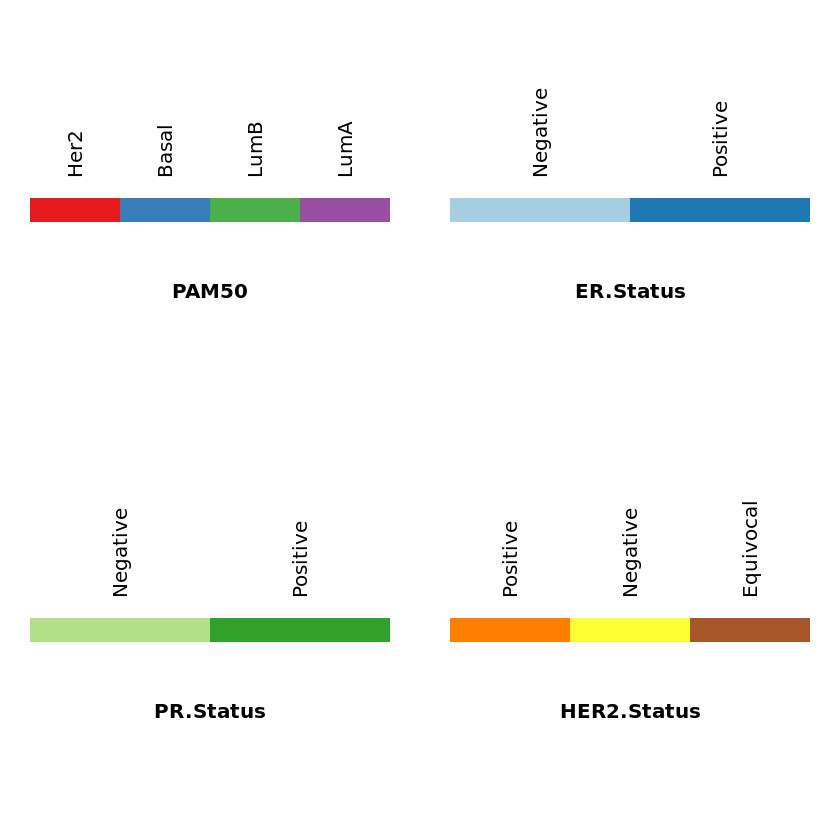

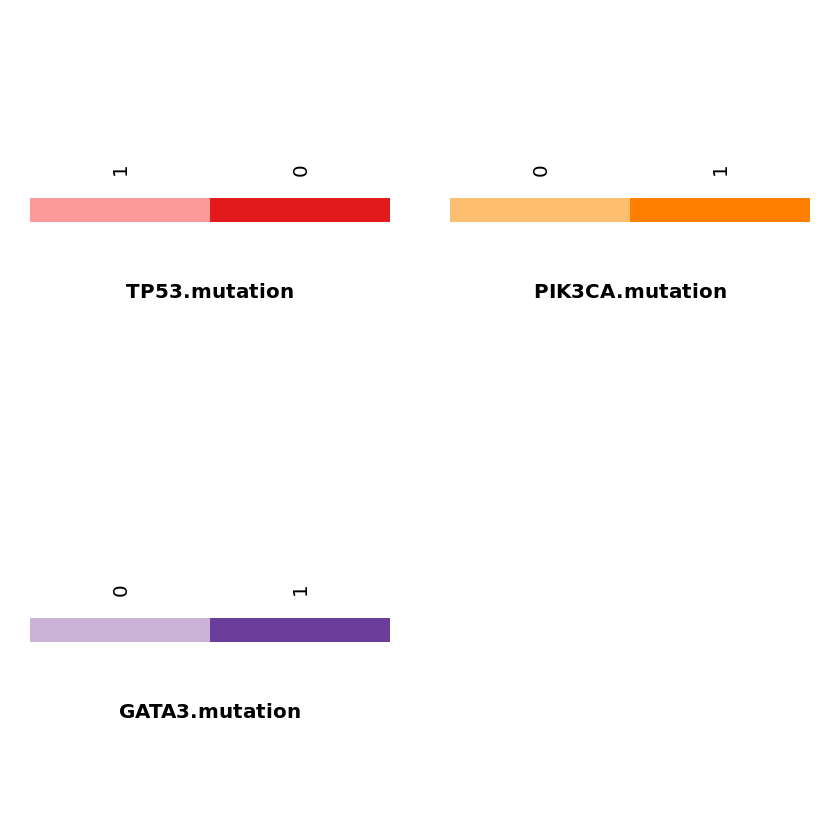

In [7]:
panda_colors_defaults()

### Color editing index
<details>
    <summary>To obtain a color editing index, click to expand and run code below (click 'o' to show/hide output).</summary>
    
Execute the cell below if you intend to edit the default color scheme from above. This will display an **indexed** list of groups, with an **indexed** sublist of their unique categories. You will need to reference these indexes while editing the default color scheme in the next section.
</details>


In [21]:
panda_colors_edit_index ( groups.colors )

 1] PAM50 =
	 1: Her2
	 2: Basal
	 3: LumB
	 4: LumA
 2] ER.Status =
	 1: Negative
	 2: Positive
 3] PR.Status =
	 1: Negative
	 2: Positive
 4] HER2.Status =
	 1: Positive
	 2: Negative
	 3: Equivocal
 5] TP53.mutation =
	 1: 1
	 2: 0
 6] PIK3CA.mutation =
	 1: 0
	 2: 1
 7] GATA3.mutation =
	 1: 0
	 2: 1


### Edit colors
<details>
    <summary>To edit colors, click here and run code below (click 'o' to show/hide output).</summary>
    
If you wish to change color assignments for one or more categories, execute the following code cell. You will be asked to enter the indices for the group and its category for which you wish to change the default color. Find these indices in the reference table above. You will then be prompted to add a color in hexadecimal #RRGGBB format (e.g., `#e4e4e4`). Deviation from this format will result in an error. 
</details>


In [19]:
groups.colors <- change_default_colors( groups.cols, all.groups, groups.colors)

$$ Enter group index for color modification: 
$$ Enter value index: 

$$ Enter color hex: 


ERROR: Error in change_default_colors(groups.cols, all.groups, groups.colors): 
============================
.. ERROR. Invalid color. Try Again..


# Sample Sets
A set of **all** samples will get created by default after running the code cell below. You will be given a choice to add additional *sub*-sets. For example:

    $$ Enter set name: luminaltumors
$$ Filter samples based on this column. Enter name: PAM50
    .. Values: Basal, Her2, LumA, LumB
    $$ Enter one (LumA) or more (LumA;LumB) values from above : LumA;LumB


This will create a subset called `tumors`. The subset will contain all samples with `Type == "Tumor"` in the sample annotation file. Entering `Tumor;Normal` will create a subset with all samples that have either `Type == "Tumor"` or `Type == "Normal"` in the sample annotation file. 

Additionally, the following code will check for any overlap between the sets you wish to create and all existing sets in your workspace. If you entered a set name which already exists in your workspace, a random suffix will be appended to your set name before it gets created and added.

In [7]:
panda_sample_subsets()


$$ Add additional sample subsets? (y/n): n
.. Sample sets to be added to Terra Workspace: 
.. all
.. DONE.


# COSMO Label Selection (optional)

The PANOPLY module COSMO (COrrection of Sample Mislabeling by Omics) quantitatively identifies mislabeled samples in proteomic datasets. This module requires the user to select at least one clinical attribute to be used to identify mislabeling between sample annotations and proteomic sample labels. 

The clinical attribute(s) selected must be binary, well-balanced, and cannot contain NAs. Below, you will see a list of the valid attributes that you may select for COSMO. Select a small number of the most clinically-relevent attributes for your samples (1-3 attributes). Typically, these attributes will include gender and/or a relevant biomarker (e.g. MSI status, TP53 mutation status, etc). 

Input your selected attribute(s) exactly as they appear below, seperated by a comma. For example: `gender` or `gender, MSI.Status, TP53.mutation`. If no clinical attribute(s) are selected, then the COSMO module will be skipped.

See more information on COSMO [here](https://doi.org/10.1016/j.patter.2021.100245).

In [ ]:
select_COSMO_attributes()

# Finalize Options
Running the following cell creates a `config.yaml` file that encapsulates all your choices upto this point, and stores it in your current Terra Workspace's Google bucket.

In [20]:
panda_finalize()

.. DONE.


# Run PANDA
PANDA runs in two independent parts. The first part splits input datasets into individual samples and uploads samples to the workspace bucket, and the second part creates sample sets. PANDA runs are time consuming and will print out a `DONE` message when complete. By re-running this notebook, additional sample sets can be created.

In [ ]:
run_panda()

.. Please wait ..
